In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
# 1.1.1 Split data into train and test data
from sklearn.model_selection import train_test_split

# 1.1.2 PReprocessong:
from sklearn.preprocessing import StandardScaler

# 1.1.3 Import class DecisionTreeClassifier
from sklearn.tree import DecisionTreeClassifier as dtree

# 1.1.4 To draw decision tree
from sklearn.tree import export_graphviz
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt
from sklearn.tree import export_graphviz


from sklearn.datasets import load_iris
import os

from sklearn.model_selection import train_test_split

from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('german_credit_data.csv')

In [3]:
df.head()

,Unnamed: 0,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Risk
0,0,67,male,2,own,NaN,little,1169,6,radio/TV,good
1,1,22,female,2,own,little,moderate,5951,48,radio/TV,bad
2,2,49,male,1,own,little,NaN,2096,12,education,good
3,3,45,male,2,free,little,little,7882,42,furniture/equipment,good
4,4,53,male,2,free,little,little,4870,24,car,bad


In [4]:
df.describe()

,Unnamed: 0,Age,Job,Credit amount,Duration
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,499.500000,35.546000,1.904000,3271.258000,20.903000
std,288.819436,11.375469,0.653614,2822.736876,12.058814
min,0.000000,19.000000,0.000000,250.000000,4.000000
25%,249.750000,27.000000,2.000000,1365.500000,12.000000
50%,499.500000,33.000000,2.000000,2319.500000,18.000000
75%,749.250000,42.000000,2.000000,3972.250000,24.000000
max,999.000000,75.000000,3.000000,18424.000000,72.000000


In [5]:
data = df.values
print(data)

[[0 67 'male' ... 6 'radio/TV' 'good']
 [1 22 'female' ... 48 'radio/TV' 'bad']
 [2 49 'male' ... 12 'education' 'good']
 ...
 [997 38 'male' ... 12 'radio/TV' 'good']
 [998 23 'male' ... 45 'radio/TV' 'bad']
 [999 27 'male' ... 45 'car' 'good']]


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Unnamed: 0        1000 non-null   int64 
 1   Age               1000 non-null   int64 
 2   Sex               1000 non-null   object
 3   Job               1000 non-null   int64 
 4   Housing           1000 non-null   object
 5   Saving accounts   817 non-null    object
 6   Checking account  606 non-null    object
 7   Credit amount     1000 non-null   int64 
 8   Duration          1000 non-null   int64 
 9   Purpose           1000 non-null   object
 10  Risk              1000 non-null   object
dtypes: int64(5), object(6)
memory usage: 86.1+ KB


In [7]:
p=df.Risk.value_counts()
p.head()

good    700
bad     300
Name: Risk, dtype: int64

In [8]:
df.isna().sum()

Unnamed: 0            0
Age                   0
Sex                   0
Job                   0
Housing               0
Saving accounts     183
Checking account    394
Credit amount         0
Duration              0
Purpose               0
Risk                  0
dtype: int64

In [9]:
df ["Saving accounts"].fillna("0", inplace = True)
df ["Checking account"].fillna("0", inplace = True)

In [10]:
df.isna().sum()

Unnamed: 0          0
Age                 0
Sex                 0
Job                 0
Housing             0
Saving accounts     0
Checking account    0
Credit amount       0
Duration            0
Purpose             0
Risk                0
dtype: int64

In [11]:
df.shape

(1000, 11)

In [12]:
# Male = 0, Female = 1
df ['Sex'] = df ['Sex'].replace({'male':0, 'female':1,'unknown' : 2})
# own = 1, rent = 0, free = 2
df ['Housing'] = df['Housing'].replace({'own' :0, 'rent': 1, 'free':2, 'unknown': 3})
# little = 1, moderate = 0, rich = 2, quite rich = 3
df['Saving accounts'] = df['Saving accounts'].replace ({'little' : 0, 'moderate' : 1, 'rich' : 2, 'quite rich' : 3, 'unknown' : 4})
# Yes: 1 # No : 0 # unknown:2
df['Checking account'] = df['Checking account'].replace ({'little' : 0, 'moderate' : 1, 'rich' : 2, 'unknown' : 3})
#good = 1, bad = 0
df['Risk'] = df['Risk'].replace ({'good': 1,'bad' : 0, 'unknown':2})
df['Purpose'] = df['Purpose'].replace ({'radio/TV': 0,'education' : 1, 'furniture/equipment' : 2, 'car' : 3, 'business' : 4, 'vacation/others' : 5, 'repairs':6,'domestic appliances':7})
df.head()


,Unnamed: 0,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Risk
0,0,67,0,2,0,0,0,1169,6,0,1
1,1,22,1,2,0,0,1,5951,48,0,0
2,2,49,0,1,0,0,0,2096,12,1,1
3,3,45,0,2,2,0,0,7882,42,2,1
4,4,53,0,2,2,0,0,4870,24,3,0


In [13]:
df.head()

,Unnamed: 0,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Risk
0,0,67,0,2,0,0,0,1169,6,0,1
1,1,22,1,2,0,0,1,5951,48,0,0
2,2,49,0,1,0,0,0,2096,12,1,1
3,3,45,0,2,2,0,0,7882,42,2,1
4,4,53,0,2,2,0,0,4870,24,3,0


In [14]:
from sklearn.model_selection import train_test_split
X = df.iloc[:,1:]
y = df.iloc[:, -1]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=100)
X.head() 

,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Risk
0,67,0,2,0,0,0,1169,6,0,1
1,22,1,2,0,0,1,5951,48,0,0
2,49,0,1,0,0,0,2096,12,1,1
3,45,0,2,2,0,0,7882,42,2,1
4,53,0,2,2,0,0,4870,24,3,0


In [15]:
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier
LR = KNeighborsClassifier(n_neighbors=100)

In [16]:
#fiting the model
LR.fit(X_train, y_train)

#prediction
y_pred = LR.predict(X_test)

#Accuracy
print("Accuracy", LR.score(X_test, y_test)*100)

Accuracy 73.0


In [17]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix (y_test, y_pred)
cm

array([[  0,  81],
       [  0, 219]], dtype=int64)

Text(33.0, 0.5, 'Actual')

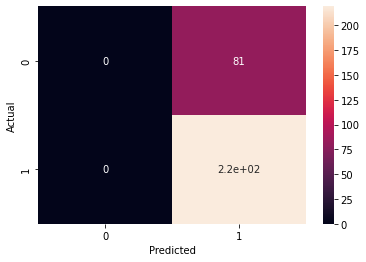

In [18]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sn
plt.figure()
sn.heatmap(cm, annot= True)
plt.xlabel('Predicted')
plt.ylabel('Actual')

In [19]:
df = dtree(
           criterion="gini",    # Alternative 'entropy'
           max_depth=None       # Alternative, specify an integer
                              # 'None' means full tree till single leaf
           )

In [20]:
df.fit(X_train,y_train)

DecisionTreeClassifier()

In [21]:
y_te = df.predict(X_test)

In [22]:
np.sum((y_test == y_te))/y_test.size 

1.0

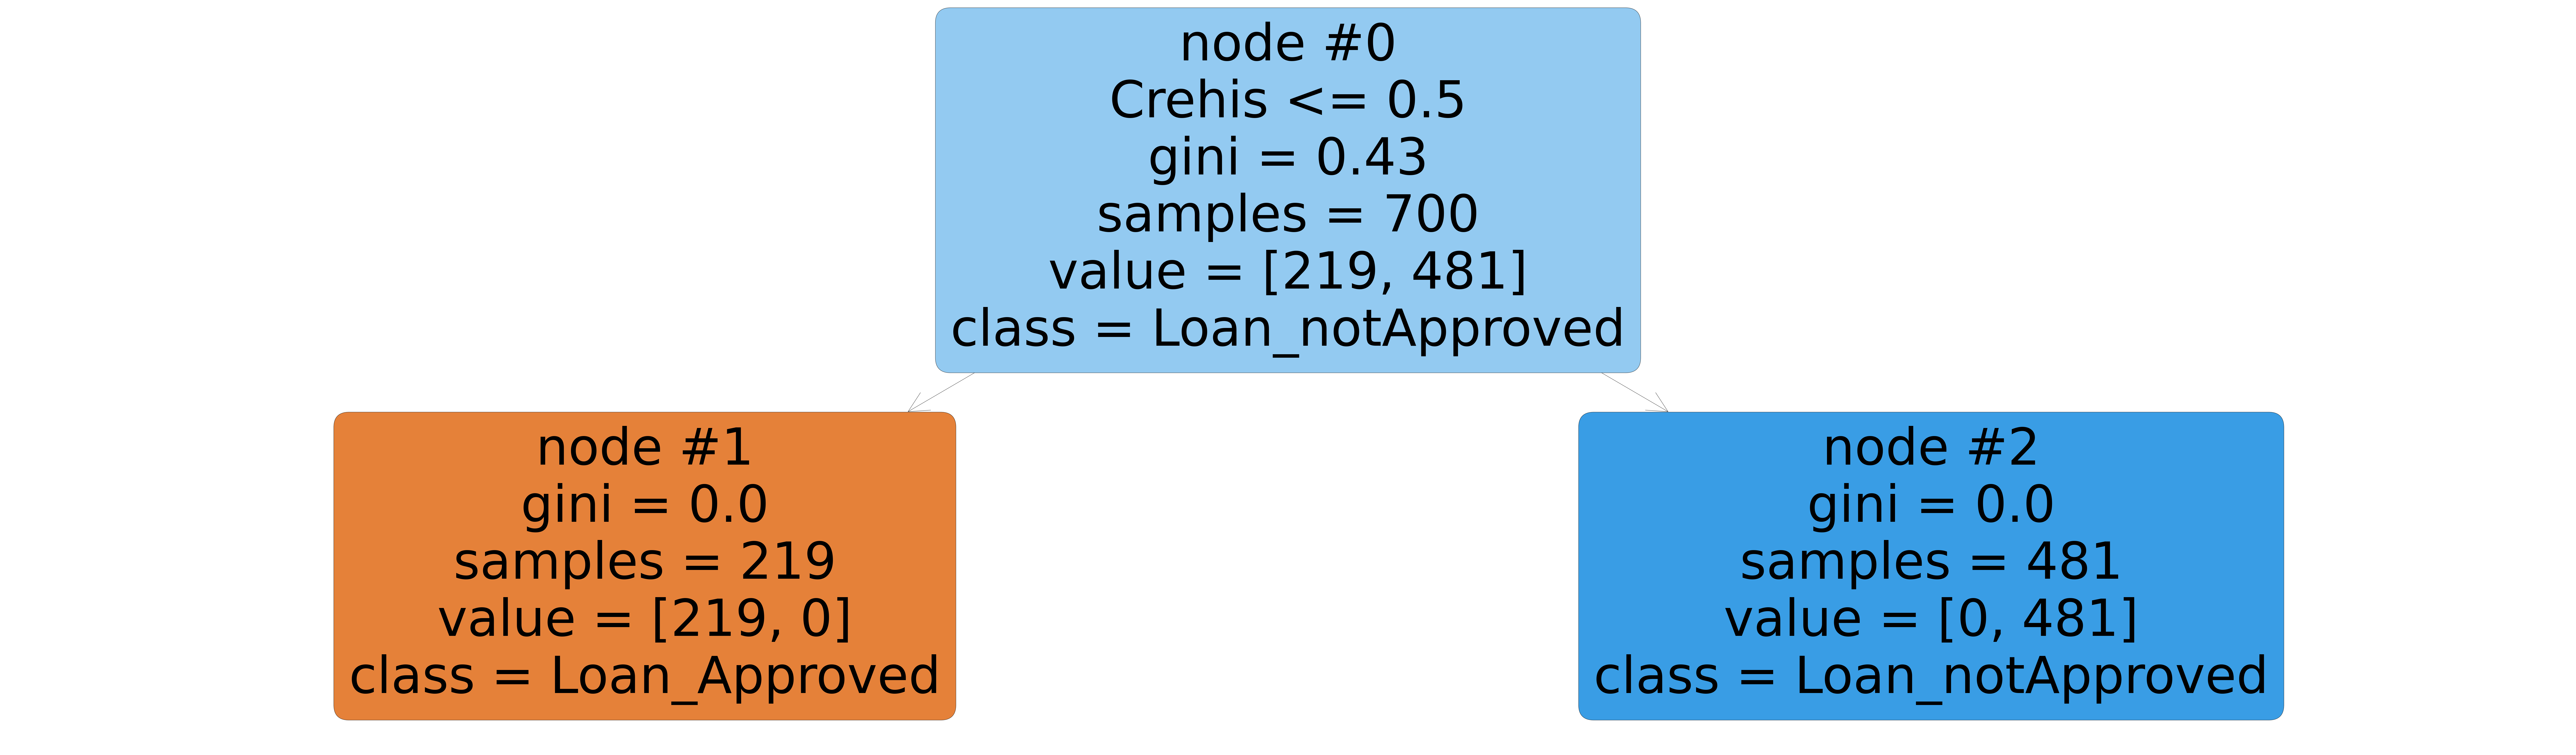

In [23]:
_= plt.figure(figsize=(200,60))
_= plot_tree(
            df,
            max_depth = 3,  # Draw upto depth of 3
            rounded = True, # Rounded boxes
            filled = True,  # Boxes filled with color
            impurity = True,# Show impurity level
            node_ids = True,# Display node_id
            feature_names = ["Gen","Marr","Depen","Edu","Self_Emp","App_Inc","CoAp_Inc","Lo_Amt","Lo_AmtTerm","Crehis","Prop_Are"],
            class_names = ["Loan_Approved","Loan_notApproved"]
            )

_= plt.show()

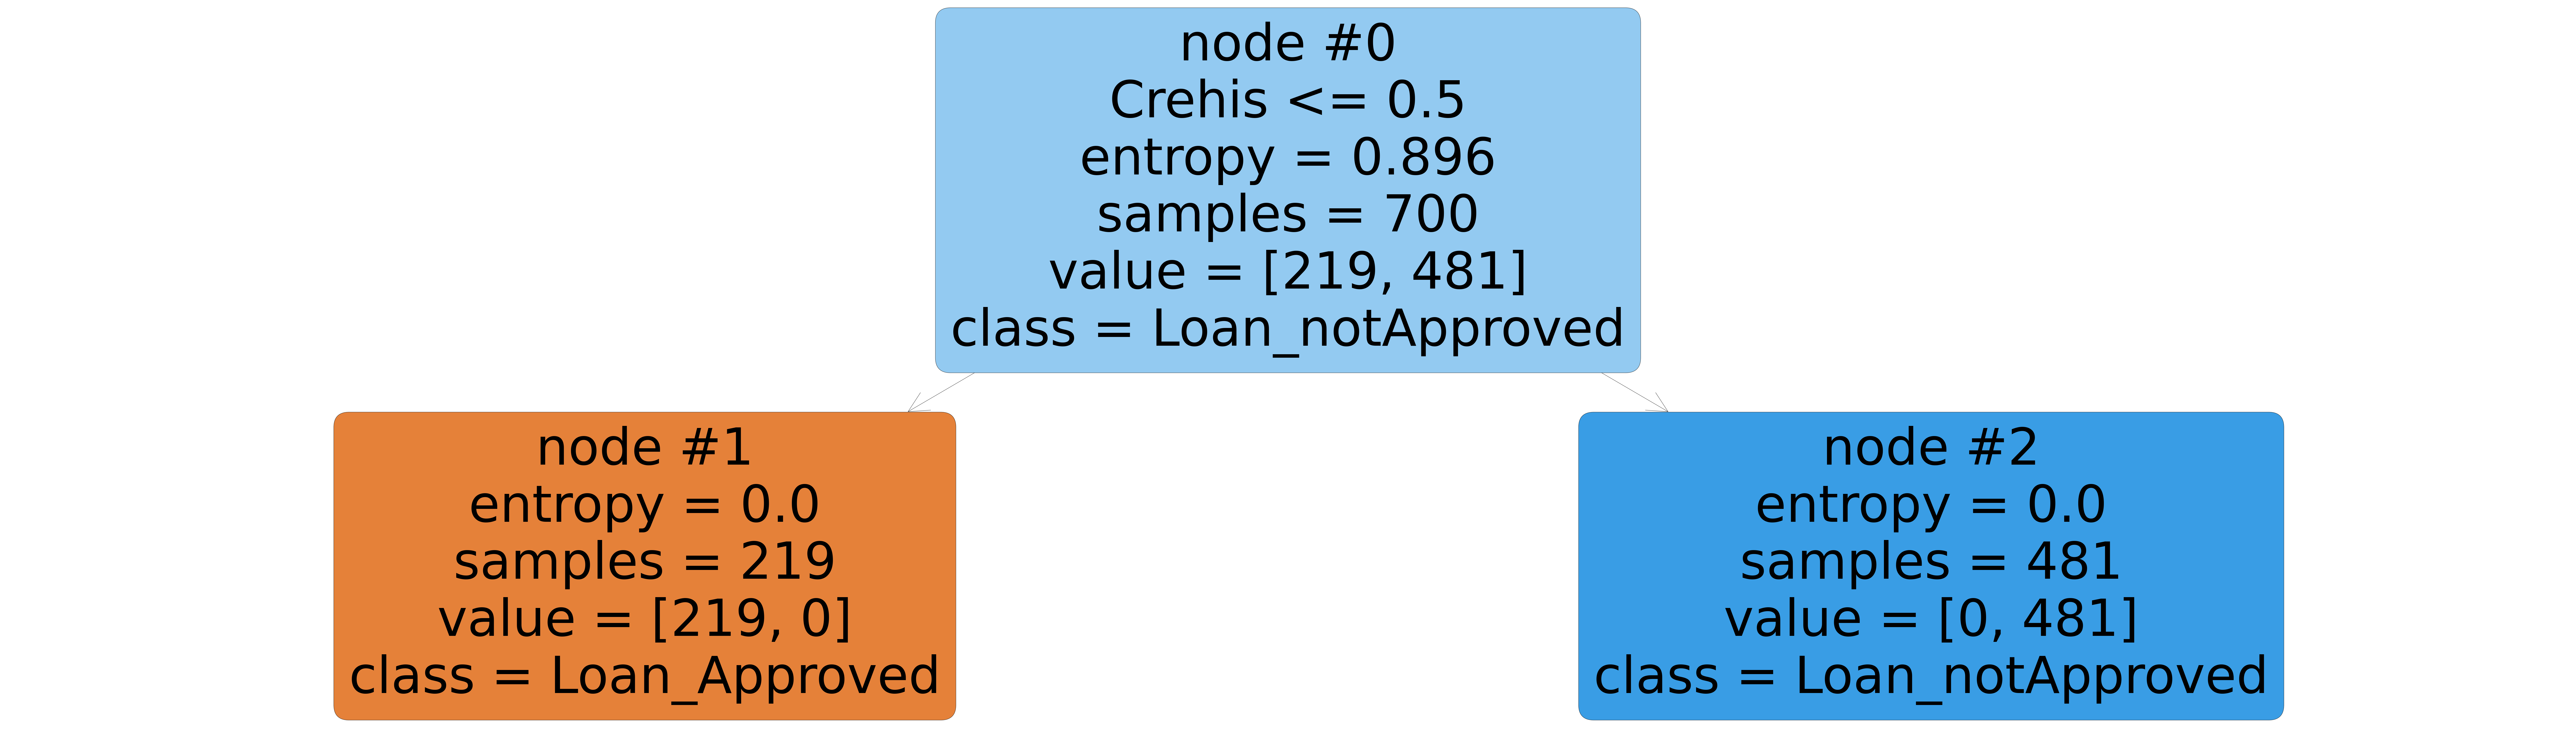

In [24]:
# 5.0 Plot decision tree with 'entropy' as criterion:

df = dtree(
           criterion="entropy",    # Alternative 'entropy'
           max_depth=None       # Alternative, specify an integer
                              # 'None' means full tree till single leaf
           )
# 5.1
_=df.fit(X_train,y_train)

# 5.2
_=plt.figure(figsize=(200,60))
_=plot_tree(
            df,
            max_depth = 3,  # Draw upto depth of 3
            rounded = True, # Rounded boxes
            filled = True,  # Boxes filled with color
            impurity = True,# Show impurity level
            node_ids = True,# Display node_id
            feature_names = ["Gen","Marr","Depen","Edu","Self_Emp","App_Inc","CoAp_Inc","Lo_Amt","Lo_AmtTerm","Crehis","Prop_Are"],
            class_names = ["Loan_Approved","Loan_notApproved"]
            )

_=plt.show()

In [25]:
y_te = df.predict(X_test)
np.sum((y_test == y_te))/y_test.size

1.0

In [26]:
fi = df.feature_importances_
fi

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 1.])

In [27]:
list(zip(X_test.columns, fi))

[('Age', 0.0),
 ('Sex', 0.0),
 ('Job', 0.0),
 ('Housing', 0.0),
 ('Saving accounts', 0.0),
 ('Checking account', 0.0),
 ('Credit amount', 0.0),
 ('Duration', 0.0),
 ('Purpose', 0.0),
 ('Risk', 1.0)]

In [28]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(n_estimators = 8)
model.fit(X_train, y_train)

RandomForestClassifier(n_estimators=8)

In [29]:
model.score(X_test, y_test)

1.0

In [30]:
y_pred = model.predict(X_test)

In [31]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix (y_test, y_pred)
cm

array([[ 81,   0],
       [  0, 219]], dtype=int64)

In [32]:
from sklearn.metrics import confusion_matrix
from sklearn import metrics
from sklearn.metrics import classification_report 
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        81
           1       1.00      1.00      1.00       219

    accuracy                           1.00       300
   macro avg       1.00      1.00      1.00       300
weighted avg       1.00      1.00      1.00       300



In [33]:
from sklearn.metrics import mean_absolute_error
print('Mean Absolute Error', metrics.mean_absolute_error(y_test, y_pred))

Mean Absolute Error 0.0


In [34]:
print(metrics.confusion_matrix(y_test, y_pred))
print (classification_report(y_test, y_pred))
print("Accuracy score is:", accuracy_score(y_test,y_pred)*100,"%s")

[[ 81   0]
 [  0 219]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        81
           1       1.00      1.00      1.00       219

    accuracy                           1.00       300
   macro avg       1.00      1.00      1.00       300
weighted avg       1.00      1.00      1.00       300

Accuracy score is: 100.0 %s


Text(33.0, 0.5, 'Actual')

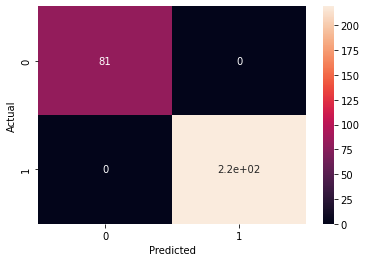

In [35]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sn
plt.figure()
sn.heatmap(cm, annot= True)
plt.xlabel('Predicted')
plt.ylabel('Actual')